Pandas is a library specializing in data analysis. In this tutorial, we are mainly interested to the functions of data manipulation.

# Data loading and description

## Pandas library - options and version

In [1]:
import pandas
pandas.options.display.max_rows =10
print(pandas.__version__)

1.1.3


## DataFrame structure

A DataFrame corresponds to an instances-variables matrix where the rows correspond to observations, the columns to attributes describing the instances.

Concerning the "heart.txt" file: the first line corresponds to the names of the fields (of the variables); from the second line, we have the values for each record (individual); the "\ t" character acts as a column separator.

In [2]:
df = pandas.read_table("heart.txt", sep ='\t',  header =0)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


'header = 0' to specify that line number 0 represents the names of the variables.

In [69]:
df.head()

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,70,masculin,D,130,322,A,C,109,non,24,2,D,presence
1,67,feminin,C,115,564,A,C,160,non,16,2,A,absence
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
3,64,masculin,D,128,263,A,A,105,oui,2,2,B,absence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence


In [4]:
print(df.shape)

(270, 13)


In [5]:
print(df.columns)

Index(['age', 'sexe', 'type_douleur', 'pression', 'cholester', 'sucre',
       'electro', 'taux_max', 'angine', 'depression', 'pic', 'vaisseau',
       'coeur'],
      dtype='object')


In [6]:
print(df.dtypes)

age              int64
sexe            object
type_douleur    object
pression         int64
cholester        int64
                 ...  
angine          object
depression       int64
pic              int64
vaisseau        object
coeur           object
Length: 13, dtype: object


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           270 non-null    int64 
 1   sexe          270 non-null    object
 2   type_douleur  270 non-null    object
 3   pression      270 non-null    int64 
 4   cholester     270 non-null    int64 
 5   sucre         270 non-null    object
 6   electro       270 non-null    object
 7   taux_max      270 non-null    int64 
 8   angine        270 non-null    object
 9   depression    270 non-null    int64 
 10  pic           270 non-null    int64 
 11  vaisseau      270 non-null    object
 12  coeur         270 non-null    object
dtypes: int64(6), object(7)
memory usage: 27.5+ KB
None


In [8]:
df.describe(include='all')

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
count,270.000000,270,270,270.000000,270.000000,270,270,270.000000,270,270.0,270.000000,270,270
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,NaN,4,2
top,NaN,masculin,D,NaN,NaN,A,C,NaN,non,NaN,NaN,A,absence
freq,NaN,183,129,NaN,NaN,230,137,NaN,181,NaN,NaN,160,150
mean,54.433333,NaN,NaN,131.344444,249.659259,NaN,NaN,149.677778,NaN,10.5,1.585185,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.0,1.000000,NaN,NaN
25%,48.000000,NaN,NaN,120.000000,213.000000,NaN,NaN,133.000000,NaN,0.0,1.000000,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,245.000000,NaN,NaN,153.500000,NaN,8.0,2.000000,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,280.000000,NaN,NaN,166.000000,NaN,16.0,2.000000,NaN,NaN


In [9]:
df.describe()

,age,pression,cholester,taux_max,depression,pic
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,10.500000,1.585185
std,9.109067,17.861608,51.686237,23.165717,11.452098,0.614390
min,29.000000,94.000000,126.000000,71.000000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,8.000000,2.000000
75%,61.000000,140.000000,280.000000,166.000000,16.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,62.000000,3.000000


In [10]:
df.describe(include = ['object'])

,sexe,type_douleur,sucre,electro,angine,vaisseau,coeur
count,270,270,270,270,270,270,270
unique,2,4,2,3,2,4,2
top,masculin,D,A,C,non,A,absence
freq,183,129,230,137,181,160,150


Some statistical indicators are not valid only for numeric variables (eg mean, median, etc. for age, max_rate, ...) and vice versa for non-numeric ones (eg top, freq, etc. for sex, pain_type , ...), hence the NANs in certain situations.

# Manipulating Variables

## Access to variables

It is possible to explicitly access the variables. First, we directly use the names of the fields (the names of the variables, at the head of the columns).

In [11]:
print(df['sexe'])

0      masculin
1       feminin
2      masculin
3      masculin
4       feminin
         ...   
265    masculin
266    masculin
267     feminin
268    masculin
269    masculin
Name: sexe, Length: 270, dtype: object


In [12]:
print(df.sexe)

0      masculin
1       feminin
2      masculin
3      masculin
4       feminin
         ...   
265    masculin
266    masculin
267     feminin
268    masculin
269    masculin
Name: sexe, Length: 270, dtype: object


In [13]:
df[['sexe','sucre']]

,sexe,sucre
0,masculin,A
1,feminin,A
2,masculin,A
3,masculin,A
4,feminin,A
...,...,...
265,masculin,B
266,masculin,A
267,feminin,A
268,masculin,A


In [14]:
print(df.age.head())

0    70
1    67
2    57
3    64
4    74
Name: age, dtype: int64


In [15]:
print(df.age.tail())

265    52
266    44
267    56
268    57
269    67
Name: age, dtype: int64


In [16]:
print(df.age.describe())

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


In [17]:
print(df.age.mean())

54.43333333333333


In [18]:
print(df.type_douleur.value_counts())

D    129
C     79
B     42
A     20
Name: type_douleur, dtype: int64


In [70]:
print(df.age[214])

29


In [20]:
print(df.age[0:3])

0    70
1    67
2    57
Name: age, dtype: int64


Sort the values of a variable in an increasing way.

In [21]:
print(df.age.sort_values())

214    29
174    34
138    34
224    35
81     35
       ..
15     71
255    71
4      74
73     76
199    77
Name: age, Length: 270, dtype: int64


We can also get the indices of the sorted values.

In [22]:
print(df.age.argsort())

0      214
1      174
2      138
3      224
4       81
      ... 
265     15
266    255
267      4
268     73
269    199
Name: age, Length: 270, dtype: int64


214 is the number of the individual with the smallest value of the age variable, then comes the number 174, etc. These results are completely consistent with those obtained with the sort_values () function.

Sorting can be generalized to DataFrame.

In [73]:
df.sort_values(by='age').head()

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
214,29,masculin,B,130,204,A,C,202,non,0,1,A,absence
174,34,masculin,A,118,182,A,C,174,non,0,1,A,absence
138,34,feminin,B,118,210,A,A,192,non,7,1,A,absence
224,35,feminin,D,138,183,A,A,182,non,14,1,A,absence
81,35,masculin,D,120,198,A,A,130,oui,16,2,A,presence


## Iterations on variables

The iterations on the variables can be done via a loop, or via the use of callback functions called using an .apply () function.

In [24]:
for col in df.columns:
    print(df[col].dtype)

int64
object
object
int64
int64
object
object
int64
object
int64
int64
object
object


In [71]:
import numpy

def operation(x):
    return(x.mean())

resultat = df.select_dtypes(exclude=['object']).apply(operation, axis=0)
print(resultat)

age            54.433333
pression      131.344444
cholester     249.659259
taux_max      149.677778
depression     10.500000
pic             1.585185
dtype: float64


# Indexed access to the data of a DataFrame


We can be access to the DataFrame values via index or index ranges. The structure then behaves like a matrix. The cell at the top and to the left has coordinate (0,0).

There are different ways to do this, using .iloc[,] is one of the easiest solutions.

In [26]:
print(df.iloc[0,0])

70


In [80]:
print(df.age[269])
print(df.iloc[-1,0])

67
67


In [81]:
df.iloc[0:5,:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,70,masculin,D,130,322,A,C,109,non,24,2,D,presence
1,67,feminin,C,115,564,A,C,160,non,16,2,A,absence
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
3,64,masculin,D,128,263,A,A,105,oui,2,2,B,absence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence


In [86]:
df.iloc[-5:,:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
265,52,masculin,C,172,199,B,A,162,non,5,1,A,absence
266,44,masculin,B,120,263,A,A,173,non,0,1,A,absence
267,56,feminin,B,140,294,A,C,153,non,13,2,A,absence
268,57,masculin,D,140,192,A,A,148,non,4,2,A,absence
269,67,masculin,D,160,286,A,C,108,oui,15,2,D,presence


In [30]:
df.iloc[0:5,0:2]

,age,sexe
0,70,masculin
1,67,feminin
2,57,masculin
3,64,masculin
4,74,feminin


In [31]:
df.iloc[0:5,[0,1,4]]

,age,sexe,cholester
0,70,masculin,322
1,67,feminin,564
2,57,masculin,261
3,64,masculin,263
4,74,feminin,269


# Restrictions with conditions - queries

We can isolate the subsets of observations meeting criteria defined on the fields. The .loc[,] method will preferably be used.

In [32]:
df.loc[df['type_douleur']=="A",:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
13,61,masculin,A,134,234,A,A,145,non,26,2,C,presence
18,64,masculin,A,110,211,A,C,144,oui,18,2,A,absence
19,40,masculin,A,140,199,A,A,178,oui,14,1,A,absence
37,59,masculin,A,160,273,A,C,125,non,0,1,A,presence
63,60,feminin,A,150,240,A,A,171,non,9,1,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,69,feminin,A,140,239,A,A,151,non,18,1,C,absence
205,52,masculin,A,152,298,B,A,178,non,12,2,A,absence
210,59,masculin,A,170,288,A,C,159,non,2,2,A,presence
228,58,feminin,A,150,283,B,C,162,non,10,1,A,absence


In [87]:
print(df['type_douleur']=="A")

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Name: type_douleur, Length: 270, dtype: bool


Only observations corresponding to True are taken over by .loc[,]. We can count them

In [34]:
print((df['type_douleur']=="A").value_counts())

False    250
True      20
Name: type_douleur, dtype: int64


In [35]:
df.loc[df['type_douleur'].isin(['A','B']), :]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence
13,61,masculin,A,134,234,A,A,145,non,26,2,C,presence
18,64,masculin,A,110,211,A,C,144,oui,18,2,A,absence
19,40,masculin,A,140,199,A,A,178,oui,14,1,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,58,masculin,B,120,284,A,C,160,non,18,2,A,presence
263,49,masculin,B,130,266,A,A,171,non,6,1,A,absence
264,48,masculin,B,110,229,A,A,168,non,10,3,A,presence
266,44,masculin,B,120,263,A,A,173,non,0,1,A,absence


In [36]:
colonnes = ['age','sexe','type_douleur','pression','cholester','angine','coeur']
df.loc[df['type_douleur'].isin(['A','B']), colonnes]

,age,sexe,type_douleur,pression,cholester,angine,coeur
2,57,masculin,B,124,261,non,presence
4,74,feminin,B,120,269,oui,absence
13,61,masculin,A,134,234,non,presence
18,64,masculin,A,110,211,oui,absence
19,40,masculin,A,140,199,oui,absence
...,...,...,...,...,...,...,...
262,58,masculin,B,120,284,non,presence
263,49,masculin,B,130,266,non,absence
264,48,masculin,B,110,229,non,presence
266,44,masculin,B,120,263,non,absence


Logical operators allows to combine conditions. We use respectively: & for AND, | for OR and ~ for negation.

In [37]:
df.loc[(df['type_douleur']=="A") & (df['angine']=="oui"),colonnes]

,age,sexe,type_douleur,pression,cholester,angine,coeur
18,64,masculin,A,110,211,oui,absence
19,40,masculin,A,140,199,oui,absence
143,51,masculin,A,125,213,oui,absence
160,38,masculin,A,120,231,oui,presence


In [38]:
df.loc[(df['age']<45) & (df['sexe']=="masculin") & (df['coeur']=="presence"),colonnes]

,age,sexe,type_douleur,pression,cholester,angine,coeur
40,40,masculin,D,152,223,non,presence
47,44,masculin,D,110,197,non,presence
50,42,masculin,D,136,315,oui,presence
81,35,masculin,D,120,198,oui,presence
147,40,masculin,D,110,167,oui,presence
...,...,...,...,...,...,...,...
182,41,masculin,D,110,172,non,presence
193,35,masculin,D,126,282,oui,presence
231,39,masculin,D,118,219,non,presence
237,43,masculin,D,120,177,oui,presence


# Summary calculations - Crossing variables

It is possible to crosses and perform summary calculations, which range from simple counting to statistical calculations involving several variables.

In [39]:
pandas.crosstab(df['sexe'],df['coeur'])

coeur,absence,presence
sexe,,
feminin,67,20
masculin,83,100


In [40]:
pandas.crosstab(df['sexe'],df['coeur'],normalize='index')

coeur,absence,presence
sexe,,
feminin,0.770115,0.229885
masculin,0.453552,0.546448


In [92]:
67/87

0.7701149425287356

We can also calculate, for example, the average of 'age' according to 'sexe' and 'coeur'.

In [94]:
pandas.crosstab(df['sexe'],df['coeur'], values=df['age'],aggfunc=pandas.Series.mean)

coeur,absence,presence
sexe,,
feminin,54.582090,59.35
masculin,51.192771,56.04


In [42]:
df.pivot_table(index=['sexe'],columns=['coeur'],values=['age'],aggfunc=pandas.Series.mean)

age         
coeur       absence presence
sexe                        
feminin   54.582090    59.35
masculin  51.192771    56.04

In [97]:
pandas.crosstab([df['sexe'],df['sucre']],df['coeur'])

coeur           absence  presence
sexe     sucre                   
feminin  A           61        15
         B            6         5
masculin A           66        88
         B           17        12

In [98]:
pandas.crosstab([df['sexe'],df['sucre'],df['angine']],df['coeur'])

coeur                  absence  presence
sexe     sucre angine                   
feminin  A     non          54         8
               oui           7         7
         B     non           5         2
               oui           1         3
masculin A     non          52        40
               oui          14        48
         B     non          16         4
               oui           1         8

In [44]:
pandas.crosstab([df['sexe'],df['sucre']],df['coeur'],normalize='index')

coeur            absence  presence
sexe     sucre                    
feminin  A      0.802632  0.197368
         B      0.545455  0.454545
masculin A      0.428571  0.571429
         B      0.586207  0.413793

The use of groupby () allows access to the sub-DataFrame associated with each item of the grouping variable. It is therefore possible to explicitly apply other processing operations to these data subsets.

In [103]:
g=df.groupby('sexe')
print(g)

print(g.get_group('masculin').shape)

(183, 13)


In [46]:
g.mean()

,age,pression,cholester,taux_max,depression,pic
sexe,,,,,,
feminin,55.678161,132.965517,264.747126,152.229885,8.885057,1.540230
masculin,53.841530,130.573770,242.486339,148.464481,11.267760,1.606557


In [47]:
print(g.get_group('masculin')['age'].mean())

53.84153005464481


We can apply different functions
$$mean:=m=\frac{1}{n}\sum_{i=1}^nx_i,\;variance:=var=\frac{1}{n-1}\sum_{i=1}^n\left(x_i-m\right)^2,\;ecart\_type:=std=\sqrt{var}$$

In [48]:
g['age','taux_max'].agg([pandas.Series.mean,pandas.Series.std])

<ipython-input-48-f4dfc24428d7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g['age','taux_max'].agg([pandas.Series.mean,pandas.Series.std])


age              taux_max           
               mean       std        mean        std
sexe                                                
feminin   55.678161  9.626144  152.229885  19.949180
masculin  53.841530  8.818189  148.464481  24.505832

In [104]:
for groupe in g:
    #print(groupe[0])
    print(pandas.Series.mean(groupe[1]['age']))

55.67816091954023
53.84153005464481


# Construction of calculated variables

As under Numpy, the calculations are vectorized for the Pandas Series type vectors. This avoids going through loops to manipulate the values of the vectors.

In [50]:
import numpy
taux_net = df['taux_max']*numpy.log(df['age'])
print(taux_net)

0      463.085981
1      672.750819
2      570.070229
3      436.682724
4      520.791876
          ...    
265    640.101482
266    654.664807
267    615.878809
268    598.371588
269    454.106803
Length: 270, dtype: float64


In [51]:
newdf = pandas.concat([df,taux_net],axis=1)
print(newdf.shape)

(270, 14)


We want to create an indicator for the sex variable, 1 for 'masculin', 0 for 'feminin'.

In [52]:
code=pandas.Series(numpy.zeros(df.shape[0]))
print(code.shape)

(270,)


In [53]:
code[df['sexe']=="masculin"]=1
print(code.value_counts())

1.0    183
0.0     87
dtype: int64


# Graphics with Matplotlib Library

Going through Matplotlib allows you to create efficient graphics. Pandas provides simple commands that encapsulate the call to these procedures.

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

Histogram.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

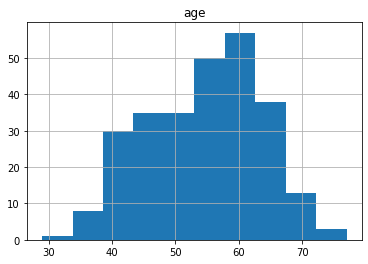

In [55]:
df.hist(column='age')

Density plot.

<AxesSubplot:ylabel='Density'>

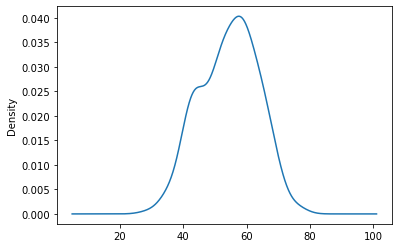

In [56]:
df['age'].plot.kde()

array([<AxesSubplot:title={'center':'feminin'}>,
       <AxesSubplot:title={'center':'masculin'}>], dtype=object)

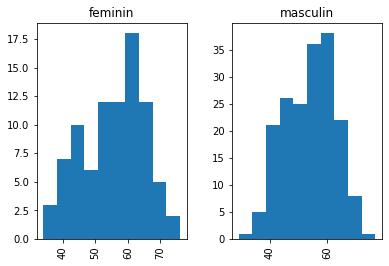

In [57]:
df.hist(column='age', by='sexe')

Comparison of distributions with boxplot.

<AxesSubplot:title={'center':'age'}, xlabel='sexe'>

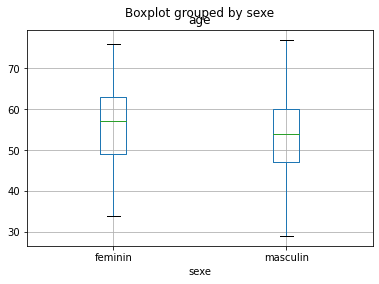

In [58]:
df.boxplot(column='age', by='sexe')

* The central value of the graph is the median (there are as many values above and below this value in the sample).
* The edges of the rectangle are the quartiles (For the lower edge, a quarter of the observations have smaller values and three quarters have larger values, the upper edge follows the same reasoning).
* The ends of the whiskers are calculated using 1.5 times the interquartile space (the distance between the 1st and 3rd quartile).

<AxesSubplot:xlabel='age', ylabel='taux_max'>

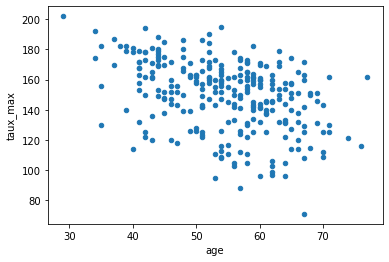

In [59]:
df.plot.scatter(x='age',y='taux_max')

<AxesSubplot:xlabel='age', ylabel='taux_max'>

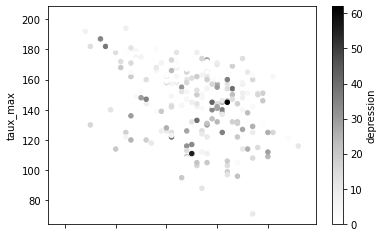

In [60]:
df.plot.scatter(x='age',y='taux_max',c='depression')

<AxesSubplot:xlabel='age', ylabel='taux_max'>

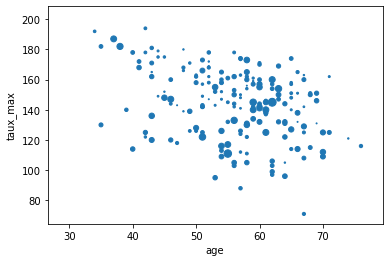

In [61]:
df.plot.scatter(x='age',y='taux_max',s=df['depression'])

<AxesSubplot:xlabel='age', ylabel='taux_max'>

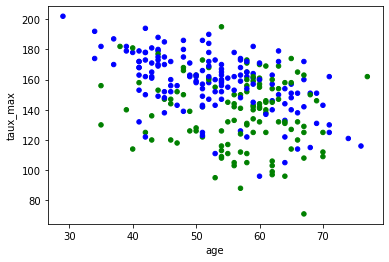

In [62]:
code_coeur=df['coeur'].eq('presence').astype('int')
df.plot.scatter(x='age',y='taux_max',c=pandas.Series(['blue','green'])[code_coeur])

Kohonen's card grid - allows you to see the density of points.

<AxesSubplot:xlabel='age', ylabel='taux_max'>

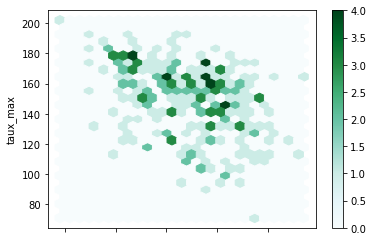

In [63]:
df.plot.hexbin(x='age',y='taux_max',gridsize=25)

Hexbin plots can be a useful alternative to scatter plots if your data is too dense to plot each point individually.e utile aux diagrammes de dispersion si vos données sont trop denses pour tracer chaque point individuellement.

<AxesSubplot:xlabel='age', ylabel='taux_max'>

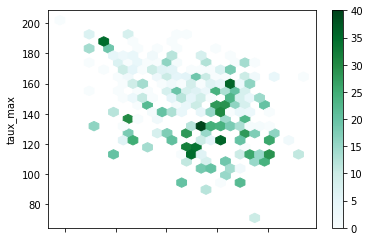

In [64]:
def moyenne(v):
    return(numpy.mean(v))

df.plot.hexbin(x='age',y='taux_max',C='depression', reduce_C_function=moyenne, gridsize=25)

Diagram.

<AxesSubplot:ylabel='sexe'>

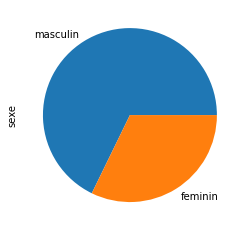

In [65]:
df['sexe'].value_counts().plot.pie()

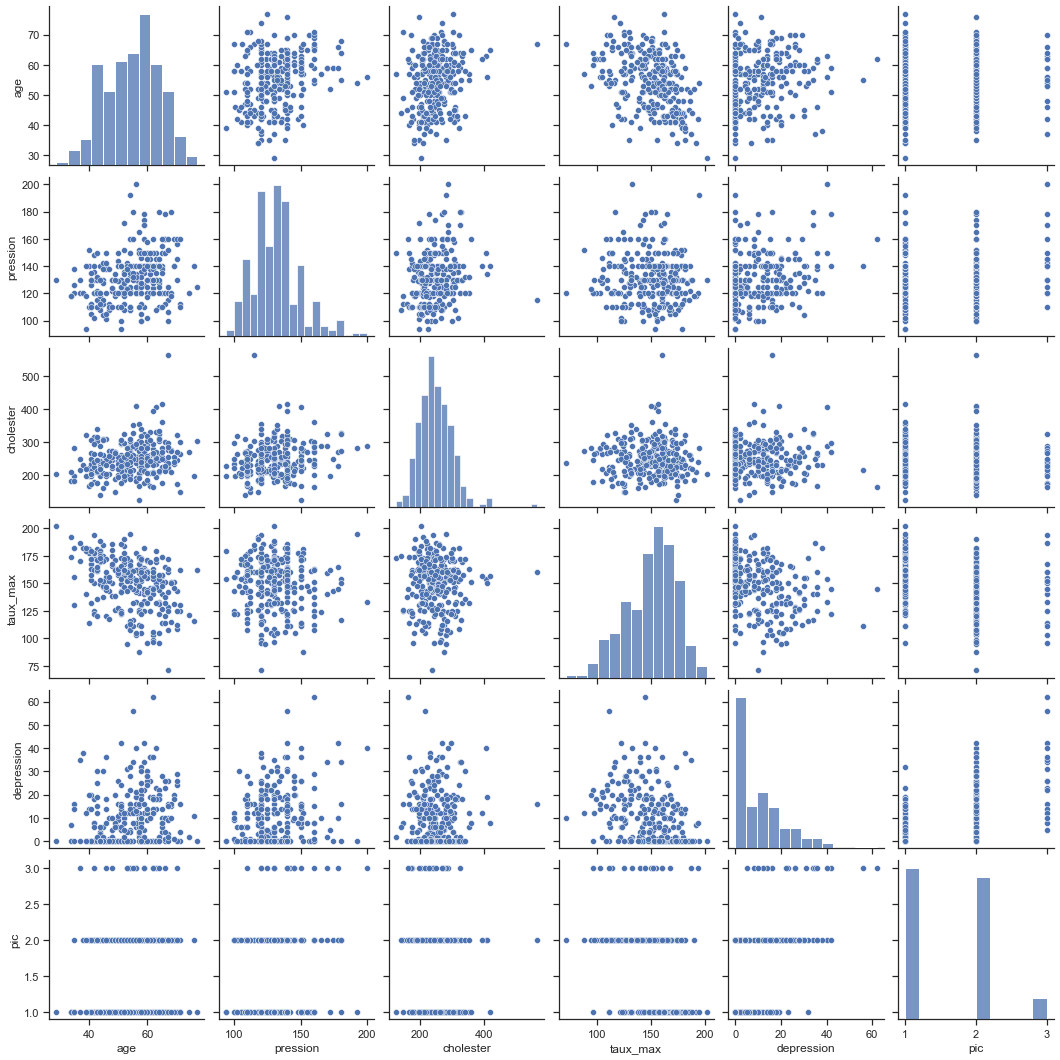

In [66]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df)